In [1]:
%pip install --upgrade pip

# Install required packages for LDA topic modeling
%pip install gensim==4.3.3
%pip install pyLDAvis==3.4.1
%pip install wordcloud==1.9.4
%pip install plotly==6.3.0
%pip install openpyxl==3.1.5

# Install NLTK and download required data
import nltk
print("📥 Downloading NLTK data...")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('punkt_tab', quiet=True)

print("✅ All packages installed successfully!")
print("🔍 Ready for LDA topic modeling analysis")



y
  Using cached pyLDAvis-3.4.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)
Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
Using cached funcy-2.0-py2.py3-none-any.whl (30 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pyLDAvis]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 46.0 MB/s  0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
📥 Downloading NLTK data...
✅ All packages installed successfully!
🔍 Ready for LDA topic modeling analysis


In [2]:
# Import all required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Google Colab specific imports
from google.colab import files
from IPython.display import display, HTML
import io
import os

# NLP and Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Topic Modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Set visualization style for Colab
plt.style.use('default')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ All libraries imported successfully!")
print("📊 Google Colab environment ready for analysis")


✅ All libraries imported successfully!
📊 Google Colab environment ready for analysis


In [3]:
# Configuration and Constants
GRIEVANCE_KEYWORDS = [
    'grievance', 'whistleblowing', 'whistleblower', 'complaint', 'report',
    'reporting', 'hotline', 'helpline', 'anonymous', 'confidential',
    'remediation', 'remedy', 'speak up', 'voice', 'concern', 'ethics'
]

# Model parameters
RANDOM_STATE = 42
MAX_TOPICS_SEARCH = 20

print("📋 Configuration set:")
print(f"   🔑 Grievance keywords: {len(GRIEVANCE_KEYWORDS)} keywords")
print(f"   🎯 Random state: {RANDOM_STATE}")
print(f"   🔍 Max topics to search: {MAX_TOPICS_SEARCH}")
print("\n📂 Ready for data upload!")


📋 Configuration set:
   🔑 Grievance keywords: 16 keywords
   🎯 Random state: 42
   🔍 Max topics to search: 20

📂 Ready for data upload!


In [4]:
# Upload your Excel file
print("📂 Please upload your Excel file containing the grievance data:")
print("   Expected file: updated_data_cleaned.xlsx")
print("   💡 Tip: Click 'Choose Files' and select your file")

uploaded = files.upload()

# Process the uploaded file
uploaded_filename = list(uploaded.keys())[0]
print(f"\n✅ File uploaded successfully: {uploaded_filename}")

# Load the dataset
df = pd.read_excel(uploaded_filename)

print(f"📊 Dataset loaded!")
print(f"   📏 Shape: {df.shape}")
print(f"   📋 Columns: {list(df.columns)}")

# Display basic information
print("\n📋 Dataset Overview:")
print(df.info())

print("\n📋 First few rows:")
display(df.head())


📂 Please upload your Excel file containing the grievance data:
   Expected file: updated_data_cleaned.xlsx
   💡 Tip: Click 'Choose Files' and select your file


Saving updated_data_cleaned.xlsx to updated_data_cleaned.xlsx

✅ File uploaded successfully: updated_data_cleaned.xlsx
📊 Dataset loaded!
   📏 Shape: (104199, 108)
   📋 Columns: ['PDFURL', 'CombinedOrganisations', 'PDFText', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Un

PDFURL  \
0  https://downloads.modern-slavery-statement-reg...   
1  https://downloads.modern-slavery-statement-reg...   
2  https://downloads.modern-slavery-statement-reg...   
3  https://downloads.modern-slavery-statement-reg...   
4                 e standard procedures for ESG due    

                               CombinedOrganisations  \
0  ASPIRE DEFENCE SERVICES LIMITED, FRAZER-NASH C...   
1                FINANCIAL OMBUDSMAN SERVICE LIMITED   
2  10 UPPER BANK STREET SEPARATE LIMITED PARTNERS...   
3                                       Centamin plc   
4                                                NaN   

                                             PDFText Unnamed: 3 Unnamed: 4  \
0  UKÂ MODERN Â SLAVERYÂ ACTÂ STATEMENT Â \n(file...        NaN        NaN   
1  Financial Ombudsman Service â€“  Confidential ...        NaN        NaN   
2  1 of 4 MODERN SLAVERY AND HUMAN TRAFFICKING ST...        NaN        NaN   
3  1 \n \nMODERN SLAVERY STATEMENT, FOR THE FISCA...        NaN        NaN   
4                                                NaN        NaN        NaN   

  Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10  \
0        NaN        NaN        NaN        NaN        NaN         NaN   
1        NaN        NaN        NaN        NaN        NaN         NaN   
2        NaN        NaN        NaN        NaN        NaN         NaN   
3        NaN        NaN        NaN        NaN        NaN         NaN   
4        NaN        NaN        NaN        NaN        NaN         NaN   

  Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

  Unnamed: 17 Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

  Unnamed: 23 Unnamed: 24 Unnamed: 25 Unnamed: 26 Unnamed: 27 Unnamed: 28  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

  Unnamed: 29 Unnamed: 30 Unnamed: 31 Unnamed: 32 Unnamed: 33 Unnamed: 34  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

  Unnamed: 35 Unnamed: 36 Unnamed: 37 Unnamed: 38 Unnamed: 39 Unnamed: 40  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

  Unnamed: 41 Unnamed: 42 Unnamed: 43 Unnamed: 44 Unnamed: 45 Unnamed: 46  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1

In [5]:
# Identify text columns for analysis
print("🔍 Identifying text columns...")

text_columns = []
column_stats = []

for col in df.columns:
    if df[col].dtype == 'object':
        # Calculate text statistics
        non_null_texts = df[col].dropna().astype(str)
        avg_length = non_null_texts.str.len().mean()
        max_length = non_null_texts.str.len().max()
        min_length = non_null_texts.str.len().min()

        # Consider as text column if average length > 10 characters
        if avg_length > 10:
            text_columns.append(col)
            column_stats.append({
                'column': col,
                'avg_length': avg_length,
                'max_length': max_length,
                'min_length': min_length,
                'non_null_count': len(non_null_texts)
            })

# Display text column statistics
print(f"📝 Found {len(text_columns)} potential text columns:")
text_stats_df = pd.DataFrame(column_stats)
if not text_stats_df.empty:
    display(text_stats_df.round(2))

    # Select the column with highest average length for analysis
    selected_column = text_stats_df.loc[text_stats_df['avg_length'].idxmax(), 'column']
    print(f"\n🎯 Selected column for analysis: '{selected_column}'")
    print(f"   Average text length: {text_stats_df.loc[text_stats_df['avg_length'].idxmax(), 'avg_length']:.1f} characters")
else:
    print("❌ No suitable text columns found!")
    selected_column = None


🔍 Identifying text columns...
📝 Found 108 potential text columns:


column  avg_length  max_length  min_length  non_null_count
0                   PDFURL       45.26        1039           1          104146
1    CombinedOrganisations       39.97        4668           1           27119
2                  PDFText     3494.53       32849           1            9434
3               Unnamed: 3       27.84         534           1            1984
4               Unnamed: 4       32.04         886           1             837
..                     ...         ...         ...         ...             ...
103           Unnamed: 103       21.00          21          21               1
104           Unnamed: 104      153.00         153         153               1
105           Unnamed: 105      255.00         255         255               1
106           Unnamed: 106       57.00          57          57               1
107           Unnamed: 107      343.00         343         343               1

[108 rows x 5 columns]


🎯 Selected column for analysis: 'PDFText'
   Average text length: 3494.5 characters


In [6]:
def preprocess_text_data(df, text_column, grievance_keywords):
    """
    Comprehensive text preprocessing function optimized for Google Colab
    """
    print(f"🔧 Starting text preprocessing for column: '{text_column}'")

    # Extract text data and handle missing values
    texts = df[text_column].fillna("").astype(str)
    print(f"📊 Total documents: {len(texts)}")

    # Identify documents containing grievance keywords
    grievance_mask = []
    grievance_texts = []

    for i, text in enumerate(texts):
        text_lower = text.lower()
        contains_keywords = any(keyword in text_lower for keyword in grievance_keywords)
        grievance_mask.append(contains_keywords)

        if contains_keywords:
            grievance_texts.append(text)

    print(f"🎯 Documents with grievance keywords: {sum(grievance_mask)} ({sum(grievance_mask)/len(texts)*100:.1f}%)")

    # Use grievance texts if available, otherwise use all texts
    if len(grievance_texts) == 0:
        print("⚠️ No texts with grievance keywords found. Using all texts.")
        texts_to_process = texts.tolist()
    else:
        texts_to_process = grievance_texts

    # Initialize preprocessing tools
    lemmatizer = WordNetLemmatizer()

    # Define stop words
    try:
        stop_words = set(stopwords.words('english'))
    except:
        # Fallback stop words if NLTK download fails
        stop_words = set(['a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from',
                         'has', 'he', 'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the',
                         'to', 'was', 'were', 'will', 'with'])

    # Add custom stop words
    custom_stop_words = {
        'said', 'say', 'says', 'would', 'could', 'should', 'also', 'one', 'two',
        'use', 'used', 'get', 'got', 'go', 'went', 'come', 'came', 'see', 'saw',
        'know', 'knew', 'think', 'thought', 'want', 'wanted', 'like', 'liked'
    }
    stop_words.update(custom_stop_words)

    # Process texts
    processed_texts = []

    print("🔄 Processing texts... (this may take a moment)")
    for i, text in enumerate(texts_to_process):
        if i % 100 == 0 and i > 0:
            print(f"   Processed {i}/{len(texts_to_process)} documents...")

        # Convert to lowercase and remove special characters
        text_clean = re.sub(r'[^a-zA-Z\s]', ' ', text.lower())

        # Remove extra whitespace
        text_clean = re.sub(r'\s+', ' ', text_clean).strip()

        # Tokenize
        try:
            tokens = word_tokenize(text_clean)
        except:
            tokens = text_clean.split()

        # Remove stop words, short words, and lemmatize
        processed_tokens = []
        for token in tokens:
            if (len(token) > 2 and
                token not in stop_words and
                token.isalpha()):
                lemmatized = lemmatizer.lemmatize(token)
                processed_tokens.append(lemmatized)

        # Join back to string
        processed_text = ' '.join(processed_tokens)

        # Only keep non-empty processed texts
        if len(processed_text.strip()) > 0:
            processed_texts.append(processed_text)

    print(f"✅ Text preprocessing completed!")
    print(f"📄 Processed documents: {len(processed_texts)}")

    return processed_texts, grievance_mask


In [7]:
# Execute text preprocessing
if selected_column is not None:
    processed_texts, grievance_mask = preprocess_text_data(df, selected_column, GRIEVANCE_KEYWORDS)

    # Display some examples of processed texts
    print("\n📋 Sample of processed texts:")
    print("-" * 60)
    for i, text in enumerate(processed_texts[:3]):
        print(f"Document {i+1}: {text[:200]}...")
        print("-" * 60)

    # Create a summary DataFrame
    processing_summary = {
        'Metric': [
            'Original Documents',
            'Documents with Grievance Keywords',
            'Percentage with Keywords',
            'Final Processed Documents',
            'Average Document Length (words)'
        ],
        'Value': [
            len(df),
            sum(grievance_mask),
            f"{sum(grievance_mask)/len(df)*100:.1f}%",
            len(processed_texts),
            f"{np.mean([len(text.split()) for text in processed_texts]):.1f}"
        ]
    }

    summary_df = pd.DataFrame(processing_summary)
    print("\n📊 Processing Summary:")
    display(summary_df)

else:
    print("❌ Cannot proceed without a text column. Please check your data.")


🔧 Starting text preprocessing for column: 'PDFText'
📊 Total documents: 104199
🎯 Documents with grievance keywords: 2957 (2.8%)
🔄 Processing texts... (this may take a moment)
   Processed 100/2957 documents...
   Processed 200/2957 documents...
   Processed 300/2957 documents...
   Processed 400/2957 documents...
   Processed 500/2957 documents...
   Processed 600/2957 documents...
   Processed 700/2957 documents...
   Processed 800/2957 documents...
   Processed 900/2957 documents...
   Processed 1000/2957 documents...
   Processed 1100/2957 documents...
   Processed 1200/2957 documents...
   Processed 1300/2957 documents...
   Processed 1400/2957 documents...
   Processed 1500/2957 documents...
   Processed 1600/2957 documents...
   Processed 1700/2957 documents...
   Processed 1800/2957 documents...
   Processed 1900/2957 documents...
   Processed 2000/2957 documents...
   Processed 2100/2957 documents...
   Processed 2200/2957 documents...
   Processed 2300/2957 documents...
   Proc

Metric   Value
0                 Original Documents  104199
1  Documents with Grievance Keywords    2957
2           Percentage with Keywords    2.8%
3          Final Processed Documents    2957
4    Average Document Length (words)   920.8

In [8]:
# Prepare corpus and dictionary for LDA
if 'processed_texts' in locals() and len(processed_texts) > 0:

    print("🔧 Preparing Gensim corpus and dictionary...")

    # Tokenize documents
    tokenized_docs = [doc.split() for doc in processed_texts]

    # Create dictionary
    dictionary = corpora.Dictionary(tokenized_docs)

    print(f"📚 Initial dictionary size: {len(dictionary)}")

    # Filter extremes - remove words that appear in less than 2 documents
    # or more than 80% of documents
    dictionary.filter_extremes(no_below=2, no_above=0.8)

    print(f"📚 Filtered dictionary size: {len(dictionary)}")

    # Create corpus (bag of words representation)
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

    print(f"📄 Corpus size: {len(corpus)}")

    # Display sample of dictionary and corpus
    print("\n📋 Sample dictionary entries:")
    sample_words = list(dictionary.token2id.items())[:10]
    for word, id_num in sample_words:
        print(f"   {word}: {id_num}")

    print("\n📋 Sample corpus entry (first document):")
    if len(corpus) > 0:
        sample_doc = corpus[0][:10]  # First 10 word-frequency pairs
        for word_id, freq in sample_doc:
            print(f"   {dictionary[word_id]}: {freq}")

    # Corpus statistics
    total_words = sum(sum(freq for _, freq in doc) for doc in corpus)
    avg_doc_length = total_words / len(corpus)

    corpus_stats = {
        'Statistic': [
            'Vocabulary size',
            'Number of documents',
            'Total word occurrences',
            'Average document length'
        ],
        'Value': [
            len(dictionary),
            len(corpus),
            total_words,
            f"{avg_doc_length:.1f} words"
        ]
    }

    print(f"\n📊 Corpus Statistics:")
    display(pd.DataFrame(corpus_stats))

else:
    print("❌ No processed texts available for corpus creation.")


🔧 Preparing Gensim corpus and dictionary...
📚 Initial dictionary size: 49822
📚 Filtered dictionary size: 19486
📄 Corpus size: 2957

📋 Sample dictionary entries:
   abuse: 0
   abused: 1
   accordance: 2
   according: 3
   accountability: 4
   acknowledgement: 5
   acknowledges: 6
   acquisition: 7
   across: 8
   action: 9

📋 Sample corpus entry (first document):
   abuse: 4
   abused: 1
   accordance: 2
   according: 1
   accountability: 1
   acknowledgement: 1
   acknowledges: 1
   acquisition: 1
   across: 6
   action: 1

📊 Corpus Statistics:


Statistic        Value
0          Vocabulary size        19486
1      Number of documents         2957
2   Total word occurrences      2110783
3  Average document length  713.8 words

🔍 Searching for optimal number of topics...
⏱️ This step may take 5-10 minutes depending on your data size...
☕ Perfect time for a coffee break!
🔍 Testing 19 different topic numbers (2 to 20)
   🔄 Testing 2 topics... (1/19)
      Coherence: 0.2855, Perplexity: -7.5897
   🔄 Testing 3 topics... (2/19)
      Coherence: 0.2984, Perplexity: -7.5733
   🔄 Testing 4 topics... (3/19)
      Coherence: 0.2973, Perplexity: -7.5607
   🔄 Testing 5 topics... (4/19)
      Coherence: 0.3046, Perplexity: -7.5544
   🔄 Testing 6 topics... (5/19)
      Coherence: 0.3129, Perplexity: -7.5499
   🔄 Testing 7 topics... (6/19)
      Coherence: 0.3097, Perplexity: -7.5448
   🔄 Testing 8 topics... (7/19)
      Coherence: 0.3075, Perplexity: -7.5405
   🔄 Testing 9 topics... (8/19)
      Coherence: 0.3093, Perplexity: -7.5409
   🔄 Testing 10 topics... (9/19)
      Coherence: 0.3209, Perplexity: -7.5451
   🔄 Testing 11 topics... (10/19)
      Coherence: 0.3200, Perplexity: -7.5475
   🔄 Testing 12 topics... (11/19)
 

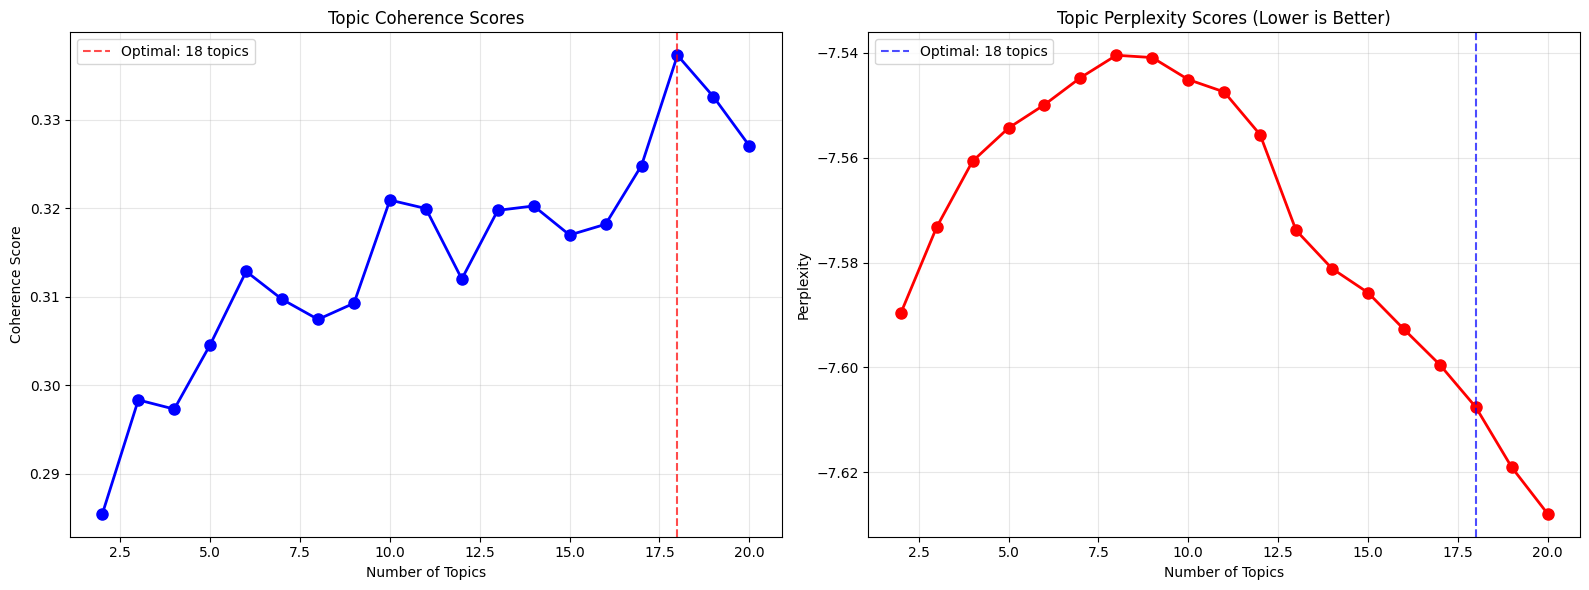


📋 Top 5 topic configurations by coherence:


num_topics  coherence_score  perplexity_score
16          18           0.3373           -7.6076
17          19           0.3326           -7.6190
18          20           0.3271           -7.6279
15          17           0.3248           -7.5995
8           10           0.3209           -7.5451

In [9]:
# Find optimal number of topics using coherence score
if 'corpus' in locals() and len(corpus) > 0:

    print("🔍 Searching for optimal number of topics...")
    print("⏱️ This step may take 5-10 minutes depending on your data size...")
    print("☕ Perfect time for a coffee break!")

    # Determine topic range based on corpus size
    max_topics = min(MAX_TOPICS_SEARCH, len(corpus) // 3)  # Reasonable upper bound
    topic_range = range(2, max_topics + 1)

    coherence_scores = []
    perplexity_scores = []

    print(f"🔍 Testing {len(topic_range)} different topic numbers ({min(topic_range)} to {max(topic_range)})")

    for i, num_topics in enumerate(topic_range):
        print(f"   🔄 Testing {num_topics} topics... ({i+1}/{len(topic_range)})")

        # Create LDA model
        lda_model = LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=RANDOM_STATE,
            passes=10,
            alpha='auto',
            per_word_topics=True,
            eval_every=None  # Don't print progress
        )

        # Calculate coherence score
        coherence_model = CoherenceModel(
            model=lda_model,
            texts=tokenized_docs,
            dictionary=dictionary,
            coherence='c_v'
        )
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append(coherence_score)

        # Calculate perplexity
        perplexity = lda_model.log_perplexity(corpus)
        perplexity_scores.append(perplexity)

        print(f"      Coherence: {coherence_score:.4f}, Perplexity: {perplexity:.4f}")

    # Find optimal number of topics
    optimal_idx = np.argmax(coherence_scores)
    optimal_topics = topic_range[optimal_idx]
    optimal_coherence = coherence_scores[optimal_idx]

    print(f"\n🎯 Optimal number of topics: {optimal_topics}")
    print(f"📊 Best coherence score: {optimal_coherence:.4f}")

    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Coherence scores
    ax1.plot(topic_range, coherence_scores, 'bo-', linewidth=2, markersize=8)
    ax1.axvline(optimal_topics, color='red', linestyle='--', alpha=0.7,
                label=f'Optimal: {optimal_topics} topics')
    ax1.set_xlabel('Number of Topics')
    ax1.set_ylabel('Coherence Score')
    ax1.set_title('Topic Coherence Scores')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Perplexity scores
    ax2.plot(topic_range, perplexity_scores, 'ro-', linewidth=2, markersize=8)
    ax2.axvline(optimal_topics, color='blue', linestyle='--', alpha=0.7,
                label=f'Optimal: {optimal_topics} topics')
    ax2.set_xlabel('Number of Topics')
    ax2.set_ylabel('Perplexity')
    ax2.set_title('Topic Perplexity Scores (Lower is Better)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Save results for later reference
    topic_evaluation_results = pd.DataFrame({
        'num_topics': topic_range,
        'coherence_score': coherence_scores,
        'perplexity_score': perplexity_scores
    })

    print("\n📋 Top 5 topic configurations by coherence:")
    top_configs = topic_evaluation_results.nlargest(5, 'coherence_score')
    display(top_configs.round(4))

else:
    print("❌ No corpus available for topic optimization.")
    optimal_topics = 5  # Default fallback


In [10]:
# Train the final LDA model and create visualizations
if 'optimal_topics' in locals() and 'corpus' in locals():

    print(f"🤖 Training final LDA model with {optimal_topics} topics...")
    print("⏱️ This may take 3-5 minutes for high-quality results...")

    # Train the final model with more iterations for better quality
    final_lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=optimal_topics,
        random_state=RANDOM_STATE,
        passes=20,  # More passes for better quality
        iterations=400,  # More iterations
        alpha='auto',
        eta='auto',
        per_word_topics=True,
        eval_every=10
    )

    print("✅ Final LDA model training completed!")

    # Display topics
    print(f"\n📋 Discovered {optimal_topics} Topics:")
    print("=" * 80)

    topics_info = []
    for idx, topic in final_lda_model.print_topics(num_topics=optimal_topics, num_words=8):
        print(f"\n🏷️  Topic {idx}:")
        print(f"   {topic}")

        # Extract clean topic words for later use
        topic_words = [word.split('*')[1].replace('"', '').strip()
                      for word in topic.split(' + ')]
        topics_info.append({
            'Topic': idx,
            'Top_Words': ', '.join(topic_words),
            'Topic_String': topic
        })

    topics_df = pd.DataFrame(topics_info)

    print("\n" + "=" * 80)

    # Calculate final model statistics
    final_coherence_model = CoherenceModel(
        model=final_lda_model,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence='c_v'
    )
    final_coherence = final_coherence_model.get_coherence()
    final_perplexity = final_lda_model.log_perplexity(corpus)

    model_performance = {
        'Metric': [
            'Number of topics',
            'Coherence score',
            'Perplexity',
            'Dictionary size',
            'Documents analyzed'
        ],
        'Value': [
            optimal_topics,
            f"{final_coherence:.4f}",
            f"{final_perplexity:.4f}",
            len(dictionary),
            len(corpus)
        ]
    }

    print(f"\n📊 Final Model Performance:")
    display(pd.DataFrame(model_performance))

else:
    print("❌ Cannot train final model - missing prerequisites.")


🤖 Training final LDA model with 18 topics...
⏱️ This may take 3-5 minutes for high-quality results...
✅ Final LDA model training completed!

📋 Discovered 18 Topics:

🏷️  Topic 0:
   0.019*"service" + 0.018*"council" + 0.017*"trust" + 0.015*"child" + 0.015*"care" + 0.014*"safeguarding" + 0.013*"staff" + 0.012*"organisation"

🏷️  Topic 1:
   0.011*"place" + 0.008*"director" + 0.008*"compliance" + 0.007*"staff" + 0.007*"work" + 0.007*"procedure" + 0.007*"anti" + 0.007*"concern"

🏷️  Topic 2:
   0.018*"australia" + 0.016*"entity" + 0.015*"operation" + 0.015*"reporting" + 0.012*"service" + 0.012*"ltd" + 0.009*"labour" + 0.008*"global"

🏷️  Topic 3:
   0.015*"organisation" + 0.014*"university" + 0.013*"activity" + 0.011*"ltd" + 0.010*"due" + 0.010*"diligence" + 0.009*"ensuring" + 0.008*"step"

🏷️  Topic 4:
   0.015*"right" + 0.008*"code" + 0.007*"global" + 0.007*"group" + 0.007*"management" + 0.007*"labour" + 0.006*"sustainability" + 0.006*"operation"

🏷️  Topic 5:
   0.011*"service" + 0.010

Metric    Value
0    Number of topics       18
1     Coherence score   0.3503
2          Perplexity  -7.5573
3     Dictionary size    19486
4  Documents analyzed     2957

📊 Creating comprehensive visualizations...
☁️ Generating topic word clouds...


<>:118: DeprecationWarning: invalid escape sequence '\d'
<>:118: DeprecationWarning: invalid escape sequence '\d'
/tmp/ipython-input-3737665609.py:118: DeprecationWarning: invalid escape sequence '\d'
  topic_labels = [f'Topic {i}' for i in topic_counts.index.str.extract('(\d+)')[0].astype(int)]


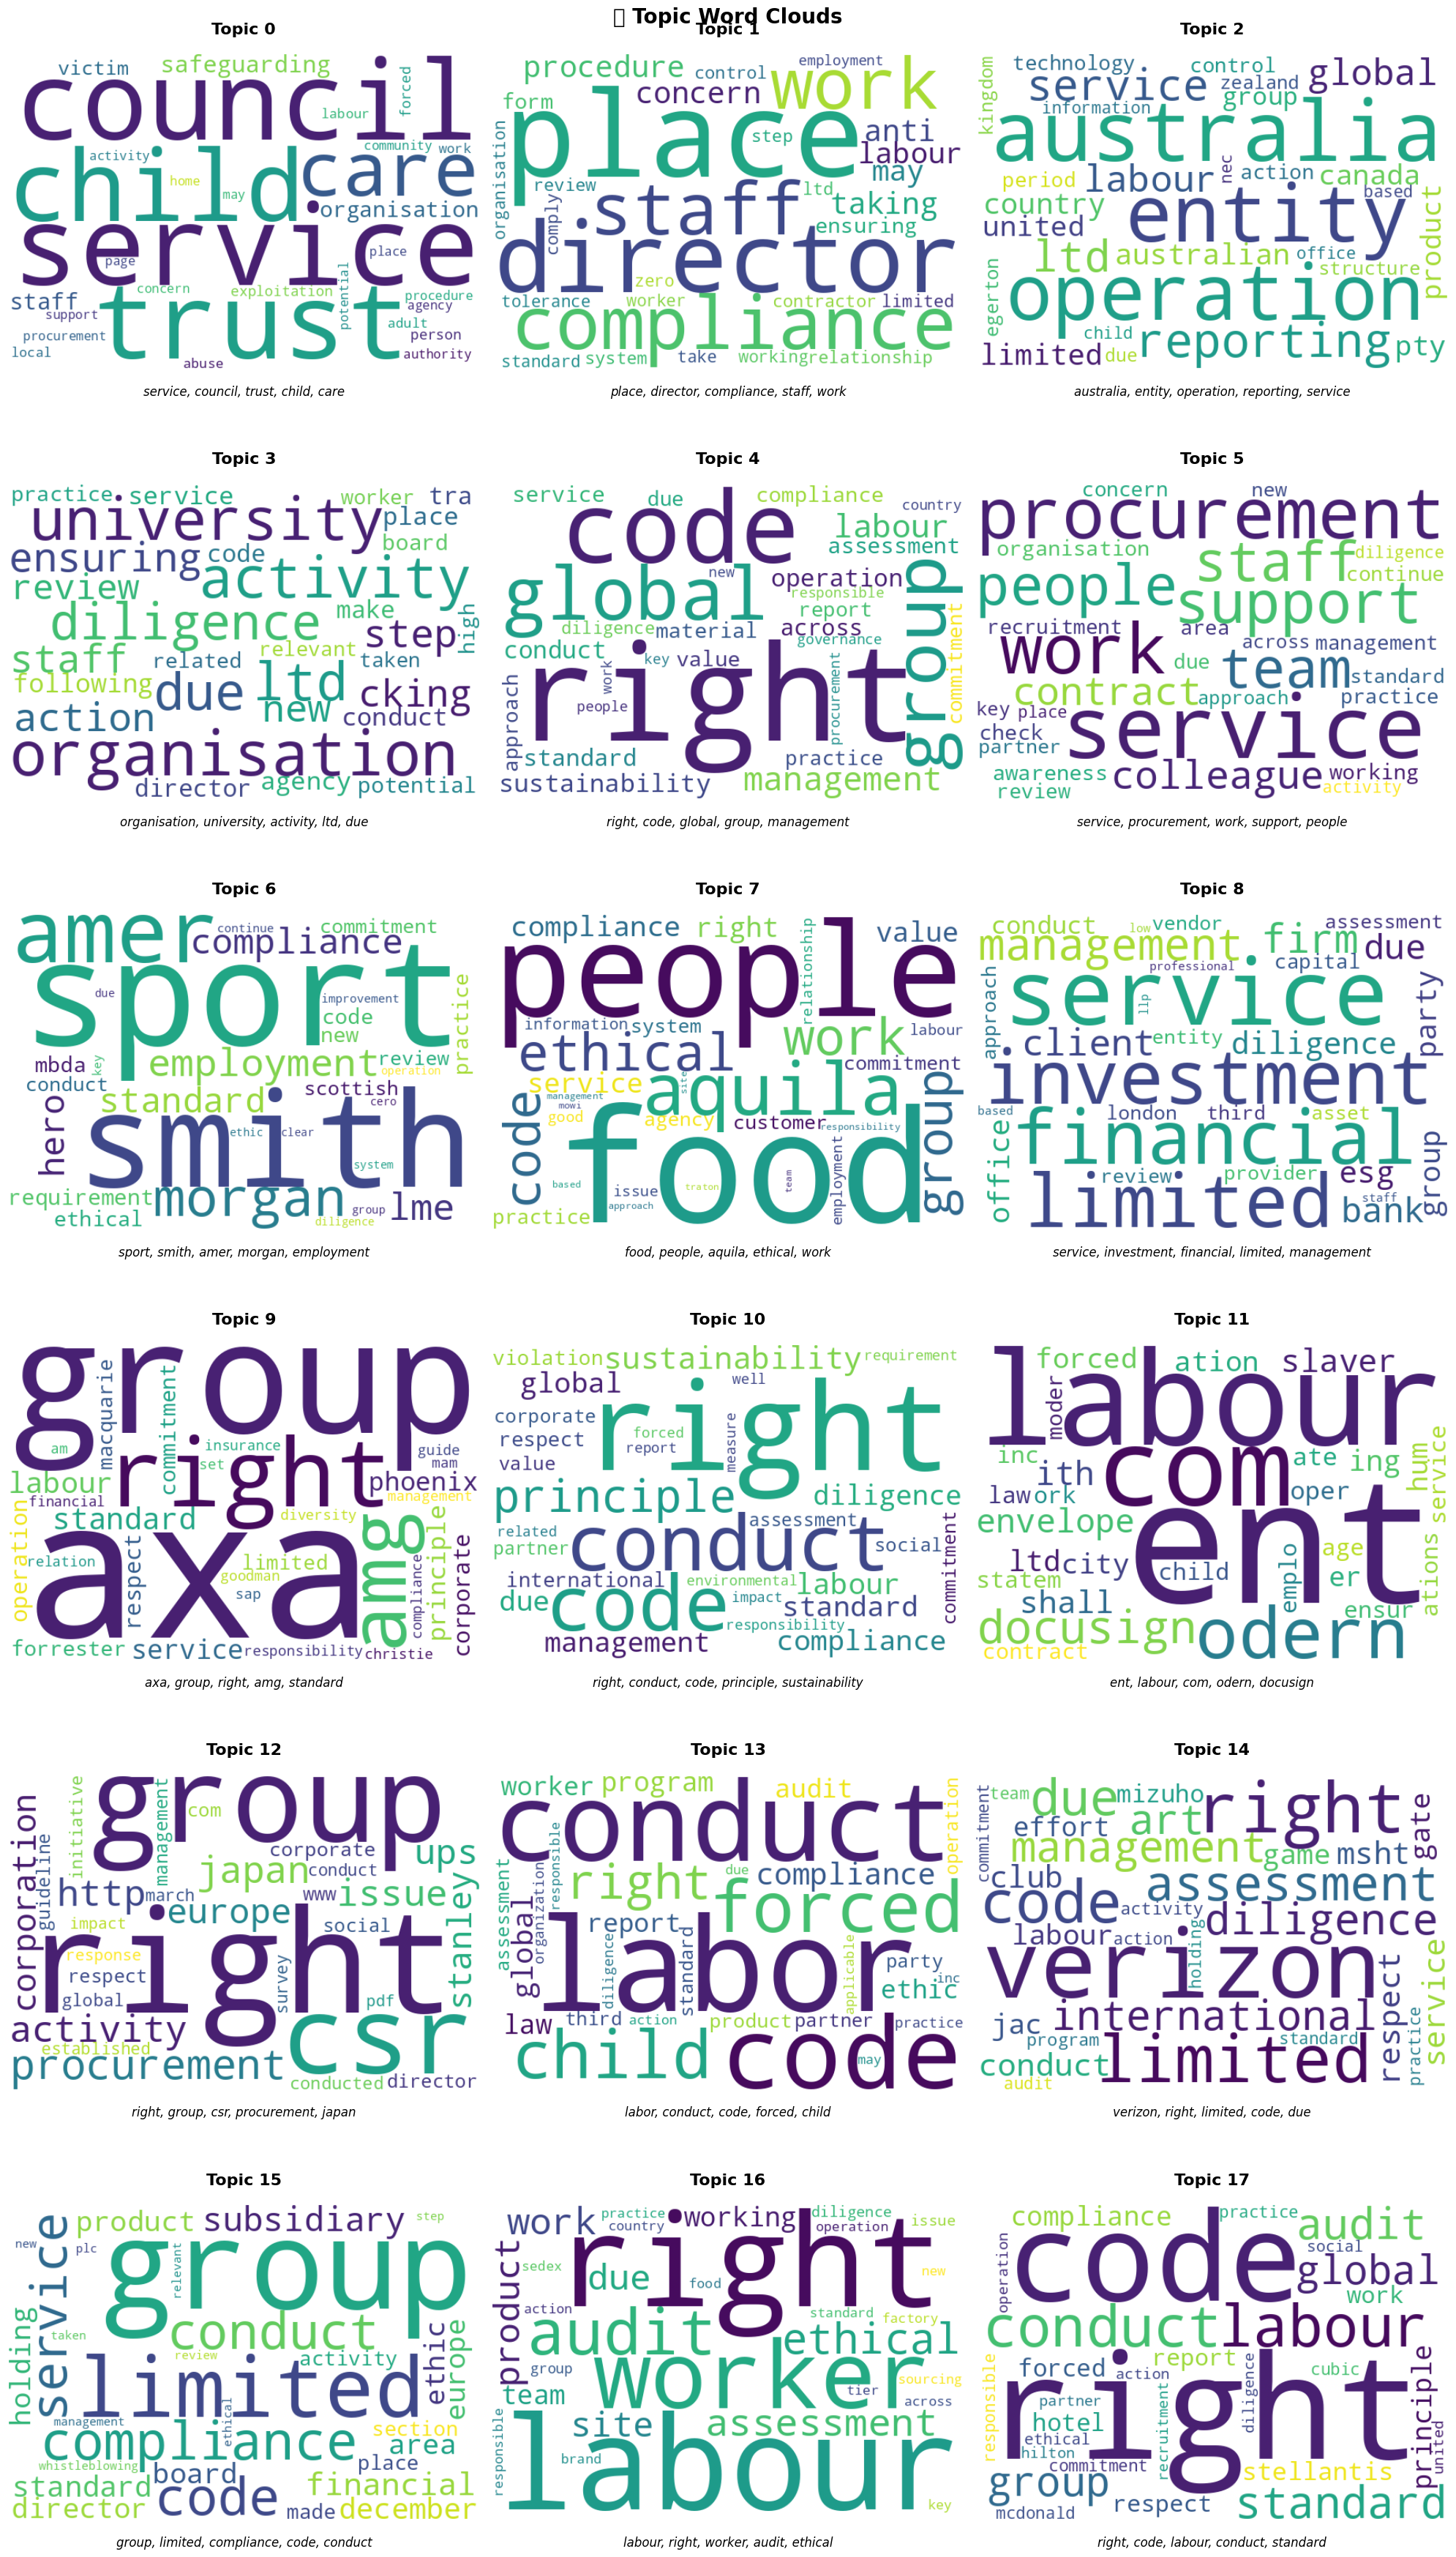

🔍 Creating interactive LDA visualization...
💾 Interactive visualization saved as 'lda_interactive_visualization.html'
📈 Analyzing document-topic distributions...


/tmp/ipython-input-3737665609.py:107: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot(box_data, labels=[f'T{i}' for i in range(final_lda_model.num_topics)])


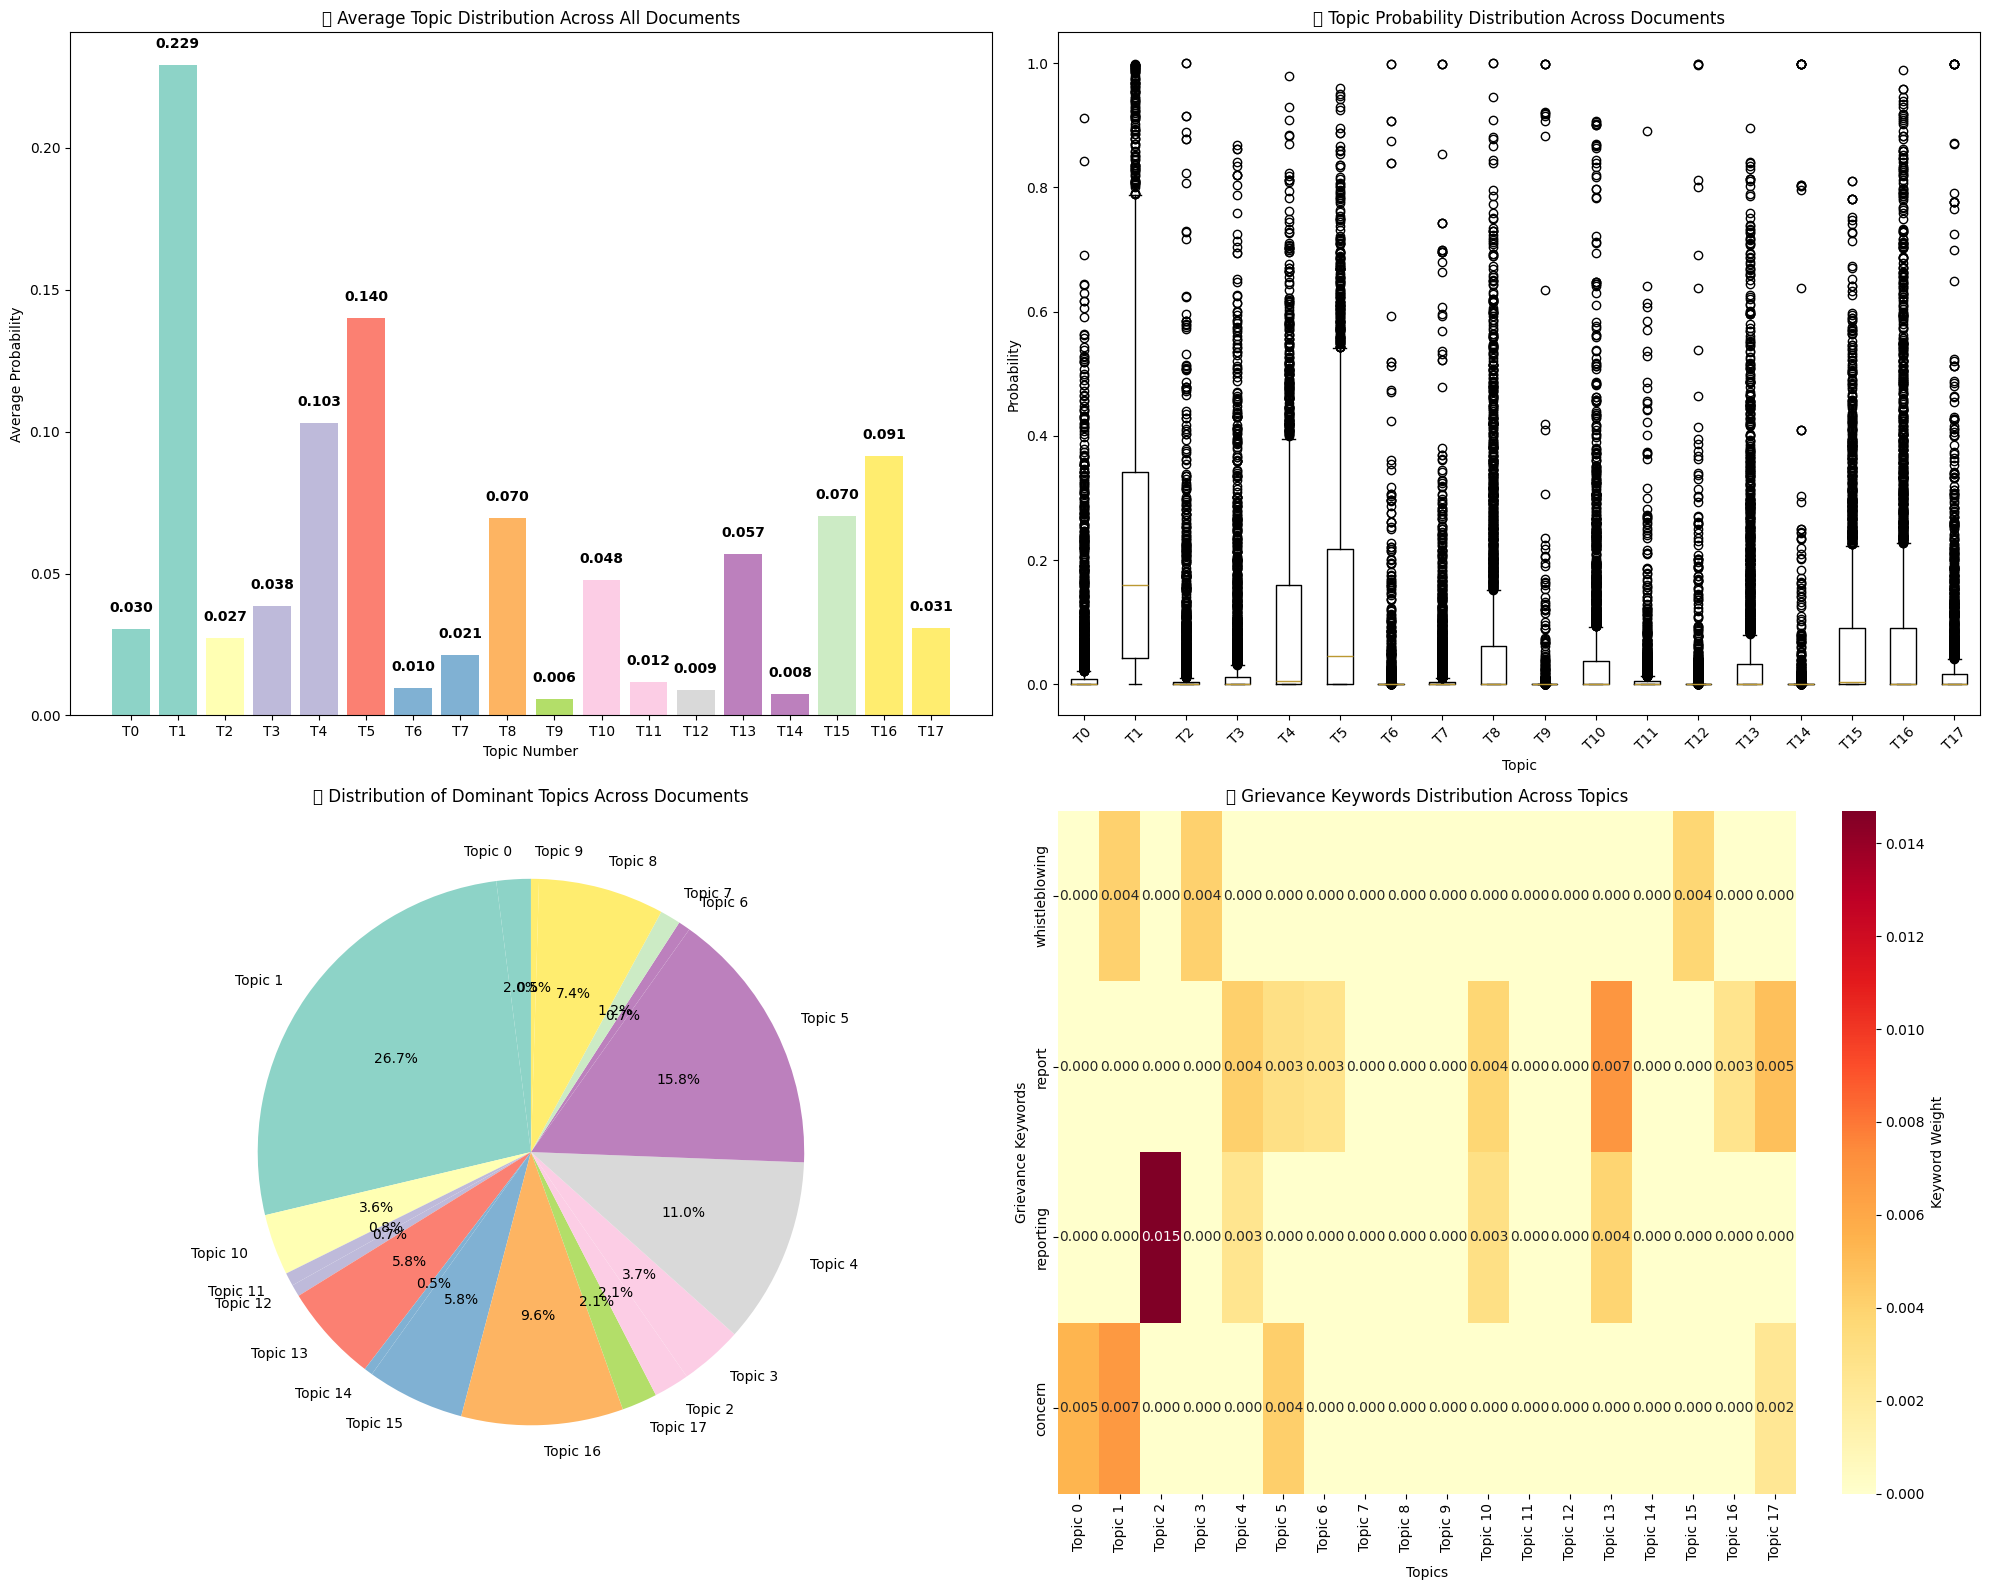


📊 Analysis Summary:


Statistic                            Value
0              Total documents analyzed                             2957
1                  Most prominent topic  Topic 1 (0.229 avg probability)
2            Average document coherence                            0.865
3        Topics with grievance keywords                             4/16
4  Most diverse topic (highest entropy)             Topic 1 (std: 0.235)

In [11]:
# Create comprehensive visualizations
if 'final_lda_model' in locals():

    print("📊 Creating comprehensive visualizations...")

    # 1. Topic Word Clouds
    print("☁️ Generating topic word clouds...")

    num_topics = final_lda_model.num_topics
    cols = 3 if num_topics > 2 else num_topics
    rows = (num_topics + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(20, 6*rows))
    if num_topics == 1:
        axes = [axes]
    elif rows == 1:
        axes = [axes] if cols == 1 else axes
    else:
        axes = axes.flatten()

    for topic_idx in range(num_topics):
        # Get topic words and weights
        topic_words = dict(final_lda_model.show_topic(topic_idx, topn=30))

        # Create word cloud
        wordcloud = WordCloud(
            width=600, height=400,
            background_color='white',
            colormap='viridis',
            max_words=30,
            relative_scaling=0.5,
            random_state=RANDOM_STATE
        ).generate_from_frequencies(topic_words)

        axes[topic_idx].imshow(wordcloud, interpolation='bilinear')
        axes[topic_idx].set_title(f'Topic {topic_idx}', fontsize=16, fontweight='bold', pad=20)
        axes[topic_idx].axis('off')

        # Add top words as subtitle
        top_5_words = [word for word, _ in final_lda_model.show_topic(topic_idx, topn=5)]
        subtitle = ', '.join(top_5_words)
        axes[topic_idx].text(0.5, -0.05, subtitle, transform=axes[topic_idx].transAxes,
                           ha='center', va='top', fontsize=12, style='italic')

    # Hide unused subplots
    for i in range(num_topics, len(axes)):
        axes[i].axis('off')

    plt.suptitle('🏷️ Topic Word Clouds', fontsize=20, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()

    # 2. Interactive LDA Visualization
    print("🔍 Creating interactive LDA visualization...")
    try:
        # Create interactive visualization
        vis_data = gensimvis.prepare(final_lda_model, corpus, dictionary, sort_topics=False)

        # Display in Colab
        pyLDAvis.display(vis_data)

        # Save as HTML for download
        pyLDAvis.save_html(vis_data, 'lda_interactive_visualization.html')
        print("💾 Interactive visualization saved as 'lda_interactive_visualization.html'")

    except Exception as e:
        print(f"⚠️ Error creating interactive visualization: {e}")
        print("   This is common in some Colab environments - other visualizations will still work!")

    # 3. Document-Topic Distribution Analysis
    print("📈 Analyzing document-topic distributions...")

    # Get document-topic distributions
    doc_topic_distributions = []
    for doc_bow in corpus:
        doc_topics = final_lda_model.get_document_topics(doc_bow, minimum_probability=0)
        doc_topic_probs = [0] * final_lda_model.num_topics
        for topic_id, prob in doc_topics:
            doc_topic_probs[topic_id] = prob
        doc_topic_distributions.append(doc_topic_probs)

    doc_topic_df = pd.DataFrame(doc_topic_distributions,
                               columns=[f'Topic {i}' for i in range(final_lda_model.num_topics)])

    # Create topic analysis plots
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))

    # Average topic distribution
    avg_topic_dist = doc_topic_df.mean()
    colors = plt.cm.Set3(np.linspace(0, 1, len(avg_topic_dist)))

    bars = axes[0, 0].bar(range(len(avg_topic_dist)), avg_topic_dist.values, color=colors)
    axes[0, 0].set_xlabel('Topic Number')
    axes[0, 0].set_ylabel('Average Probability')
    axes[0, 0].set_title('📊 Average Topic Distribution Across All Documents')
    axes[0, 0].set_xticks(range(len(avg_topic_dist)))
    axes[0, 0].set_xticklabels([f'T{i}' for i in range(len(avg_topic_dist))])

    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                       f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

    # Topic distribution boxplot
    box_data = [doc_topic_df[col].values for col in doc_topic_df.columns]
    axes[0, 1].boxplot(box_data, labels=[f'T{i}' for i in range(final_lda_model.num_topics)])
    axes[0, 1].set_xlabel('Topic')
    axes[0, 1].set_ylabel('Probability')
    axes[0, 1].set_title('📦 Topic Probability Distribution Across Documents')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Dominant topic per document
    dominant_topics = doc_topic_df.idxmax(axis=1)
    topic_counts = dominant_topics.value_counts().sort_index()

    pie_colors = [colors[i] for i in range(len(topic_counts))]
    topic_labels = [f'Topic {i}' for i in topic_counts.index.str.extract('(\d+)')[0].astype(int)]
    wedges, texts, autotexts = axes[1, 0].pie(topic_counts.values,
                                             labels=topic_labels,
                                             colors=pie_colors,
                                             autopct='%1.1f%%',
                                             startangle=90)
    axes[1, 0].set_title('🥧 Distribution of Dominant Topics Across Documents')

    # Grievance keywords analysis
    keyword_topic_matrix = {}
    for keyword in GRIEVANCE_KEYWORDS:
        keyword_topic_matrix[keyword] = []
        for topic_idx in range(final_lda_model.num_topics):
            topic_words = dict(final_lda_model.show_topic(topic_idx, topn=50))
            keyword_weight = topic_words.get(keyword, 0.0)
            keyword_topic_matrix[keyword].append(keyword_weight)

    # Create heatmap
    keyword_df = pd.DataFrame(keyword_topic_matrix,
                             index=[f'Topic {i}' for i in range(final_lda_model.num_topics)])
    keyword_df = keyword_df.T

    # Only show keywords that appear in at least one topic
    keyword_df_filtered = keyword_df[keyword_df.sum(axis=1) > 0]

    if not keyword_df_filtered.empty:
        import seaborn as sns
        axes[1, 1].remove()  # Remove the subplot
        plt.subplot(2, 2, 4)
        sns.heatmap(keyword_df_filtered,
                   annot=True,
                   fmt='.3f',
                   cmap='YlOrRd',
                   cbar_kws={'label': 'Keyword Weight'})
        plt.title('🔑 Grievance Keywords Distribution Across Topics')
        plt.xlabel('Topics')
        plt.ylabel('Grievance Keywords')
    else:
        axes[1, 1].text(0.5, 0.5, 'No grievance keywords\nfound in topics',
                       ha='center', va='center', transform=axes[1, 1].transAxes,
                       fontsize=14, style='italic')
        axes[1, 1].set_title('🔑 Grievance Keywords Analysis')

    plt.tight_layout()
    plt.show()

    # Summary statistics
    print("\n📊 Analysis Summary:")
    summary_stats = {
        'Statistic': [
            'Total documents analyzed',
            'Most prominent topic',
            'Average document coherence',
            'Topics with grievance keywords',
            'Most diverse topic (highest entropy)'
        ],
        'Value': [
            len(doc_topic_df),
            f"{avg_topic_dist.idxmax()} ({avg_topic_dist.max():.3f} avg probability)",
            f"{(1 - doc_topic_df.std(axis=1)).mean():.3f}",
            f"{(keyword_df.sum(axis=1) > 0).sum()}/{len(GRIEVANCE_KEYWORDS)}",
            f"Topic {doc_topic_df.std().idxmax().split()[1]} (std: {doc_topic_df.std().max():.3f})"
        ]
    }

    display(pd.DataFrame(summary_stats))

else:
    print("❌ No LDA model available for visualization.")


In [12]:
# Save and download results
if 'final_lda_model' in locals():

    print("💾 Saving analysis results...")

    try:
        # 1. Save topic summary
        if 'topics_df' in locals():
            topics_df.to_csv('topic_summary.csv', index=False)
            print("✅ Topic summary saved as 'topic_summary.csv'")

        # 2. Save document-topic distributions
        if 'doc_topic_df' in locals():
            doc_topic_df.to_csv('document_topic_distributions.csv', index=False)
            print("✅ Document-topic distributions saved as 'document_topic_distributions.csv'")

        # 3. Save topic evaluation results
        if 'topic_evaluation_results' in locals():
            topic_evaluation_results.to_csv('topic_evaluation_scores.csv', index=False)
            print("✅ Topic evaluation scores saved as 'topic_evaluation_scores.csv'")

        # 4. Save model performance summary
        if 'model_performance' in locals():
            pd.DataFrame(model_performance).to_csv('model_performance.csv', index=False)
            print("✅ Model performance saved as 'model_performance.csv'")

        # 5. Save analysis summary
        if 'summary_stats' in locals():
            pd.DataFrame(summary_stats).to_csv('analysis_summary.csv', index=False)
            print("✅ Analysis summary saved as 'analysis_summary.csv'")

        # 6. Save grievance keywords analysis
        if 'keyword_df' in locals():
            keyword_df.to_csv('grievance_keywords_analysis.csv')
            print("✅ Grievance keywords analysis saved as 'grievance_keywords_analysis.csv'")

        print("\n📁 Files ready for download:")
        available_files = []

        # Check which files exist
        import os
        potential_files = [
            'topic_summary.csv',
            'document_topic_distributions.csv',
            'topic_evaluation_scores.csv',
            'model_performance.csv',
            'analysis_summary.csv',
            'grievance_keywords_analysis.csv',
            'lda_interactive_visualization.html'
        ]

        for file in potential_files:
            if os.path.exists(file):
                available_files.append(file)
                print(f"   📄 {file}")

        # Download files
        print(f"\n🔽 Downloading {len(available_files)} files...")
        for file in available_files:
            try:
                files.download(file)
                print(f"   ✅ Downloaded: {file}")
            except:
                print(f"   ⚠️ Could not download: {file}")

        print("\n🎉 Analysis completed successfully!")
        print("\n📊 What you now have:")
        print("   • Comprehensive topic model of your grievance data")
        print("   • Visual analysis of topic distributions")
        print("   • Interactive HTML visualization for exploration")
        print("   • CSV files with detailed results")
        print("   • Model performance metrics")
        print("   • Grievance keywords analysis")

    except Exception as e:
        print(f"⚠️ Error saving files: {e}")
        print("   The analysis was successful, but some files couldn't be saved for download")

else:
    print("❌ No model results available to save.")


💾 Saving analysis results...
✅ Topic summary saved as 'topic_summary.csv'
✅ Document-topic distributions saved as 'document_topic_distributions.csv'
✅ Topic evaluation scores saved as 'topic_evaluation_scores.csv'
✅ Model performance saved as 'model_performance.csv'
✅ Analysis summary saved as 'analysis_summary.csv'
✅ Grievance keywords analysis saved as 'grievance_keywords_analysis.csv'

📁 Files ready for download:
   📄 topic_summary.csv
   📄 document_topic_distributions.csv
   📄 topic_evaluation_scores.csv
   📄 model_performance.csv
   📄 analysis_summary.csv
   📄 grievance_keywords_analysis.csv
   📄 lda_interactive_visualization.html

🔽 Downloading 7 files...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ Downloaded: topic_summary.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ Downloaded: document_topic_distributions.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ Downloaded: topic_evaluation_scores.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ Downloaded: model_performance.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ Downloaded: analysis_summary.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ Downloaded: grievance_keywords_analysis.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ Downloaded: lda_interactive_visualization.html

🎉 Analysis completed successfully!

📊 What you now have:
   • Comprehensive topic model of your grievance data
   • Visual analysis of topic distributions
   • Interactive HTML visualization for exploration
   • CSV files with detailed results
   • Model performance metrics
   • Grievance keywords analysis
